In [22]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Load the income data and get the first 5 records
df = pd.read_csv("adult_income_data.csv")
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [24]:
#  Script to read the txt file line by line and extract the first line, which is the header of the adult_income_data.csv

names = []
with open('adult_income_names.txt','r') as f: 
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [25]:
names.append('Income') # add a new value 'Income' to the names

In [26]:
# Print the adult income data csv file after merging the data from csv and the columns from 'names' 
df = pd.read_csv("adult_income_data.csv",names=names) 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [27]:
df.describe() # Get the statistical summary

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
# List of variables with classes
vars_class =['workclass','education','marital-status','occupation','relationship','sex','native-country']

In [29]:
# A loop to identify the different classes in the variables mentioned above
for v in vars_class:
    classes=df[v].unique()
    num_classes = df[v].nunique()
    print("There are {} classes in the \"{}\"column. They are:{}".format(num_classes,v,classes)) 
    print("-"*100)

There are 9 classes in the "workclass"column. They are:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
There are 16 classes in the "education"column. They are:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
There are 7 classes in the "marital-status"column. They are:[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
There are 15 classes in the "occupation"column. They are:[' Adm-clerical' ' Exec-manager

In [30]:
# Identify the number of null values in the columns
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [31]:
# Create a subset with age,education and occupation columns
df_subset = df[['age','education','occupation']]
df_subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<AxesSubplot:>

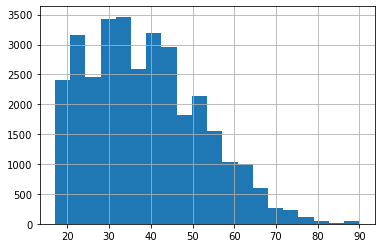

In [32]:
# Plot a Histogram with bin size 20
df_subset['age'].hist(bins=20)

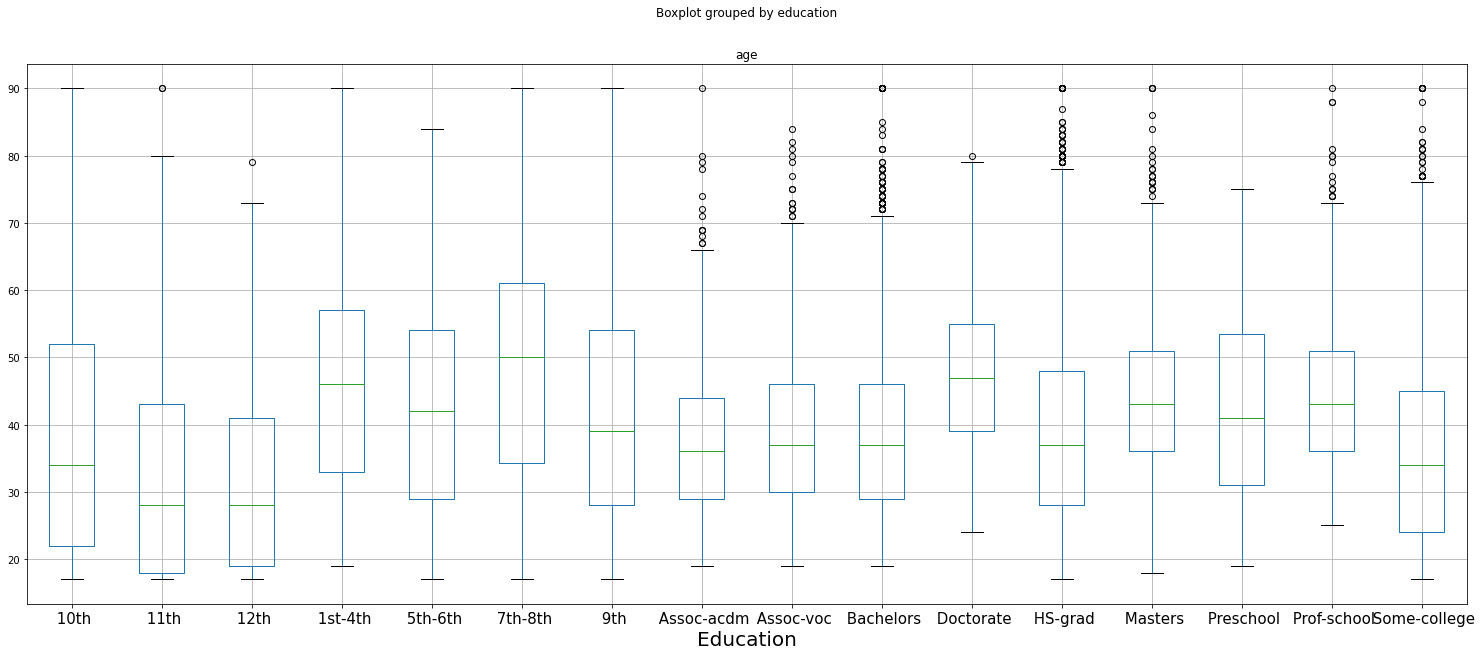

In [33]:
# Plot Box plots of age grouped by Education
df_subset.boxplot(column='age',by='education',figsize=(25,10)) 
plt.xticks(fontsize=15)
plt.xlabel("Education",fontsize=20)
plt.show()


In [34]:
# A function to remove any white spaces
def strip_whitespace(s):
    return s.strip()

In [35]:
# Use apply method to apply the above function to remove white spaces.
# education column
df_subset['education_stripped']=df['education'].apply(strip_whitespace)
df_subset['education']=df_subset['education_stripped']
df_subset.drop(labels=['education_stripped'],axis=1,inplace=True) 

# Occupation column
df_subset['occupation_stripped']=df['occupation'].apply(strip_whitespace)
df_subset['occupation']=df_subset['occupation_stripped']
df_subset.drop(labels=['occupation_stripped'],axis=1,inplace=True) 

<ipython-input-35-f53a150458c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education_stripped']=df['education'].apply(strip_whitespace)
<ipython-input-35-f53a150458c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['education']=df_subset['education_stripped']
C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [36]:
# Number of people who are aged between 30 and 50 
df_filtered=df_subset[(df_subset['age']>=30) & (df_subset['age']<=50)]

In [37]:
# Check first 5 values
df_filtered.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [38]:
# Find the shape of the filtered data frame
answer_1=df_filtered.shape[0]
print("There are {} people of age between 30 and 50 in this dataset.".format(answer_1)) 

There are 16390 people of age between 30 and 50 in this dataset.


In [39]:
# Group the records based on occupation to find summary statistics and how the mean age is distributed.
df_subset.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


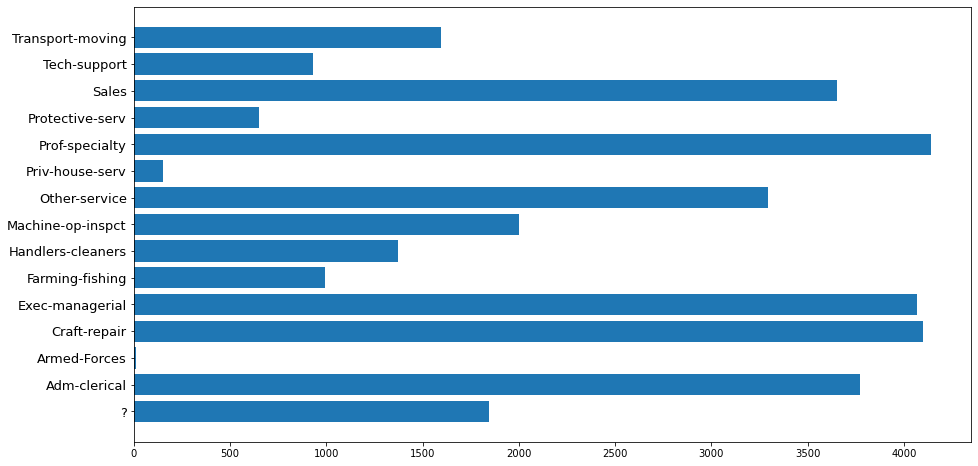

In [40]:
# Identify the representation of groups by plotting bar chart of column counts
occupation_stats= df_subset.groupby('occupation').describe()['age']
#Plot the values on a bar chart
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [41]:
# Merging example
# Dataset 1
df_1 = df[['age','workclass','occupation']].sample(5,random_state=101)
df_1.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [42]:
# Dataset 2
df_2 = df[['education','occupation']].sample(5,random_state=101)
df_2.head()

,education,occupation
22357,HS-grad,Machine-op-inspct
26009,11th,Sales
20734,HS-grad,Exec-managerial
17695,10th,Handlers-cleaners
27908,7th-8th,Craft-repair


In [43]:
# Merging the datasets y applying inner join on occupation
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education
0,51,Private,Machine-op-inspct,HS-grad
1,19,Private,Sales,11th
2,40,Private,Exec-managerial,HS-grad
3,17,Private,Handlers-cleaners,10th
4,61,Private,Craft-repair,7th-8th
